# CS5228 Rental Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import ListedColormap
# load data
train_data = pd.read_csv('./data/processed/train.csv')
test_data = pd.read_csv('./data/processed/test.csv')

X_train, y_train = train_data.drop(columns='monthly_rent'), train_data['monthly_rent'].copy()
X_test = test_data

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training Linear Regression...
Linear Regression training completed.
Linear Regression training result saved.

Linear Regression evaluation:

284564.2116964444 414.3138339194966


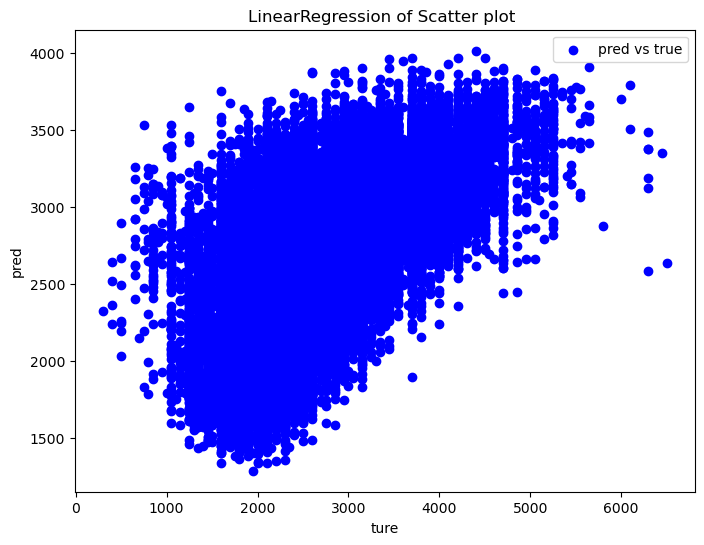

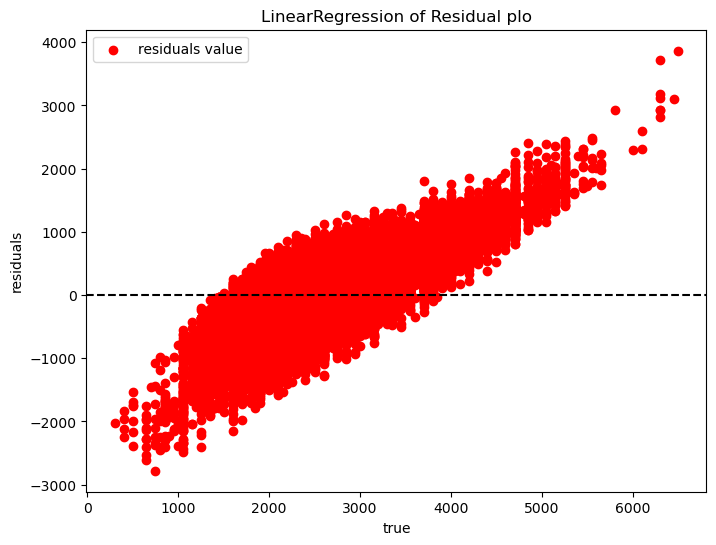

In [7]:
# train different model and evaluation
# For LinearRegression
name_LinearRegression = 'Linear Regression'
model_LinearRegression = LinearRegression()
print(f'Training {name_LinearRegression}...')
model_LinearRegression.fit(X_train, y_train)
y_pred = model_LinearRegression.predict(X_test)

y_train_pred = model_LinearRegression.predict(X_train)

print(f'{name_LinearRegression} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_LinearRegression + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_LinearRegression} training result saved.\n')

print('{} evaluation:\n'.format(name_LinearRegression))

mse_LinearRegression = mean_squared_error(y_train, y_train_pred)

mae_LinearRegression = mean_absolute_error(y_train, y_train_pred)
print(mse_LinearRegression,mae_LinearRegression)

# Both mse and mae are too big

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('LinearRegression of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('LinearRegression of Residual plo')
plt.show()

Training Ridge Regression...
Ridge Regression training completed.
Ridge Regression training result saved.

Ridge Regression evaluation:

260516.16801775078 396.3241505334082


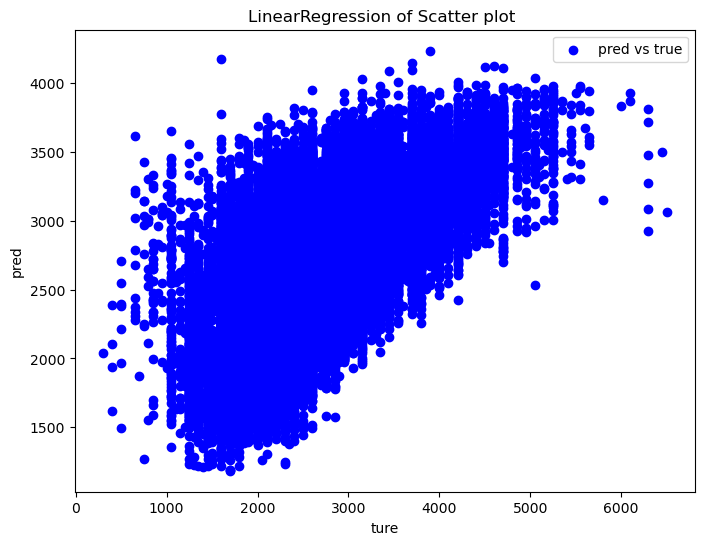

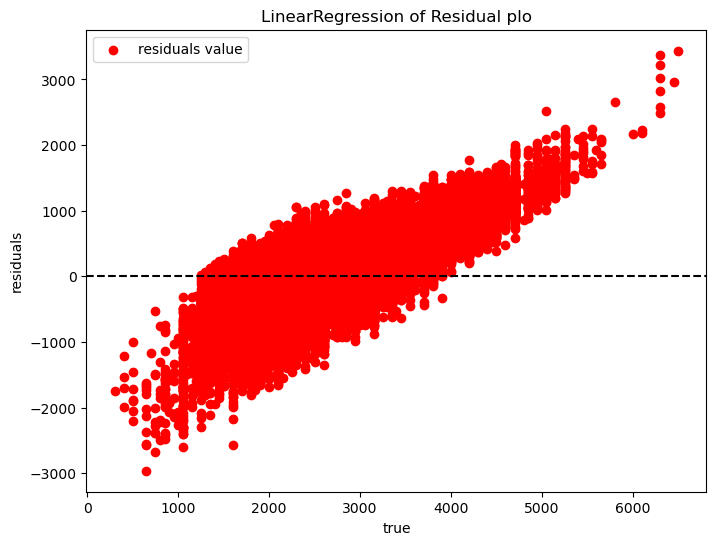

In [2]:
# train different model and evaluation
# For name_RidgeRegression
name_RidgeRegression = 'Ridge Regression'
model_RidgeRegression = Ridge()
print(f'Training {name_RidgeRegression}...')
model_RidgeRegression.fit(X_train, y_train)
y_pred = model_RidgeRegression.predict(X_test)

y_train_pred = model_RidgeRegression.predict(X_train)

print(f'{name_RidgeRegression} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_RidgeRegression + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_RidgeRegression} training result saved.\n')

print('{} evaluation:\n'.format(name_RidgeRegression))

mse_LinearRegression = mean_squared_error(y_train, y_train_pred)

mae_LinearRegression = mean_absolute_error(y_train, y_train_pred)
print(mse_LinearRegression,mae_LinearRegression)

# Both mse and mae are too big

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('LinearRegression of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('LinearRegression of Residual plo')
plt.show()

Training Elastic Net...
Elastic Net training completed.
Elastic Net training result saved.

Elastic Net evaluation:

258303.70333474898 393.6620105621556


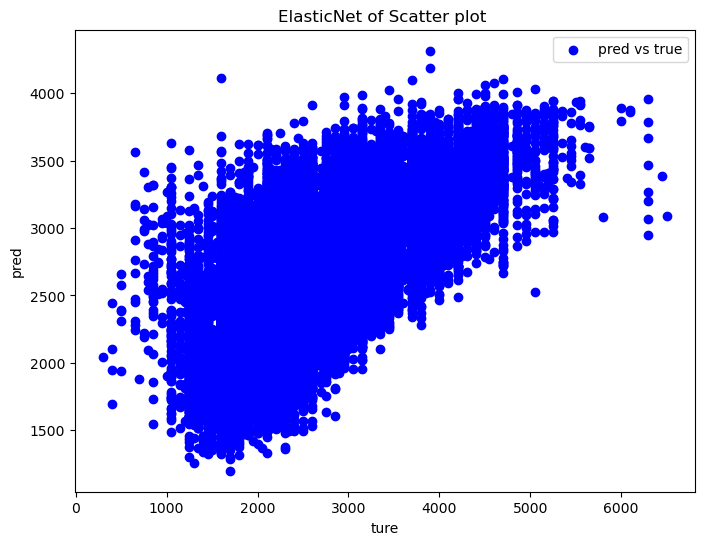

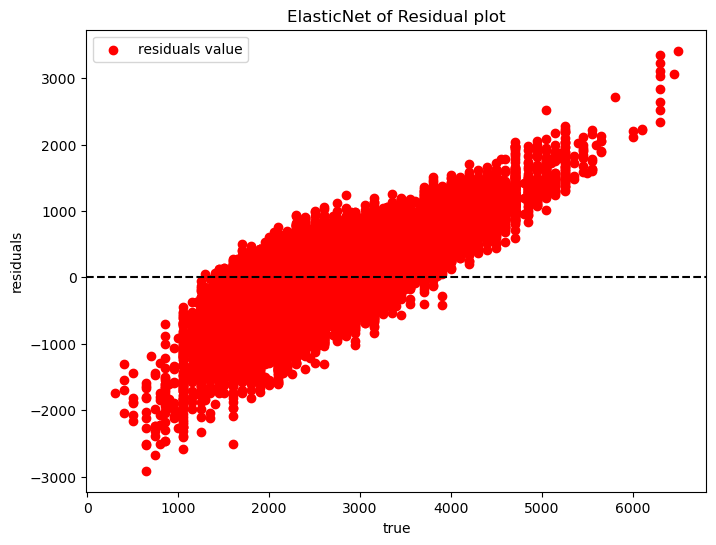

In [6]:
name_ElasticNet = 'Elastic Net'
model_ElasticNet = ElasticNet(alpha= 0.1, l1_ratio=0.5, random_state=42)
print(f'Training {name_ElasticNet}...')

model_ElasticNet.fit(X_train, y_train)
y_pred = model_ElasticNet.predict(X_test)

y_train_pred = model_ElasticNet.predict(X_train)

print(f'{name_ElasticNet} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_ElasticNet + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_ElasticNet} training result saved.\n')

print('{} evaluation:\n'.format(name_ElasticNet))

mse_ElasticNet = mean_squared_error(y_train, y_train_pred)
mae_ElasticNet = mean_absolute_error(y_train, y_train_pred)
print(mse_ElasticNet,mae_ElasticNet)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('ElasticNet of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('ElasticNet of Residual plot')
plt.show()

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


Random Forest training completed.
Random Forest training result saved.

Random Forest evaluation:

256189.82968927277 387.6135720557776


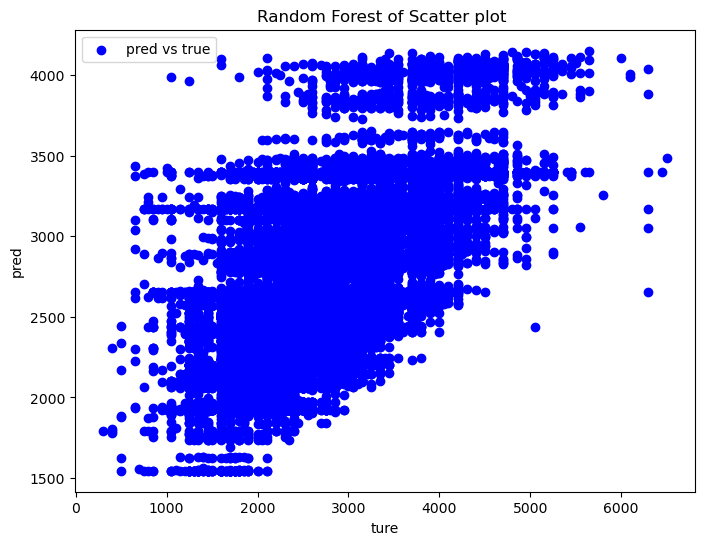

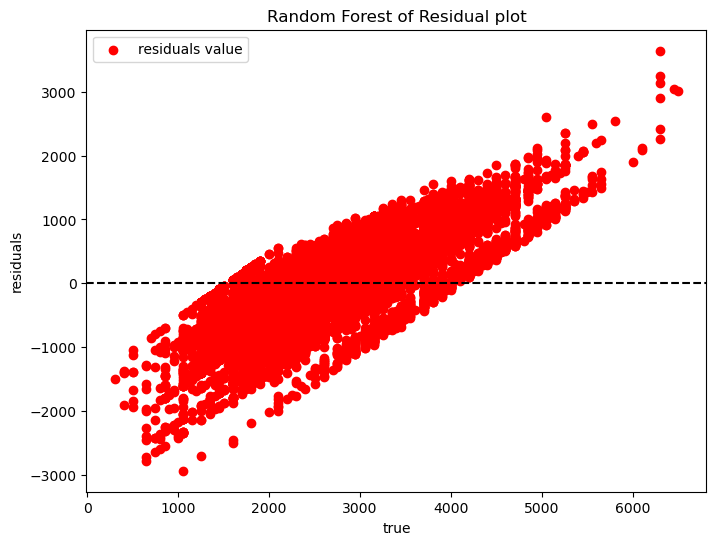

In [17]:

name_RandomForest = 'Random Forest'
model_RandomForest = RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1, n_estimators = 300, max_depth = 5)
print(f'Training {name_RandomForest}...')

model_RandomForest.fit(X_train, y_train)
y_pred = model_RandomForest.predict(X_test)

y_train_pred = model_RandomForest.predict(X_train)

print(f'{name_RandomForest} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_RandomForest + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_RandomForest} training result saved.\n')

print('{} evaluation:\n'.format(name_RandomForest))

mse_RandomForest = mean_squared_error(y_train, y_train_pred)
mae_RandomForest = mean_absolute_error(y_train, y_train_pred)
print(mse_RandomForest,mae_RandomForest)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('Random Forest of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Random Forest of Residual plot')
plt.show()



Training AdaBoost...
AdaBoost training completed.
AdaBoost training result saved.

AdaBoost evaluation:

274332.3993140895 413.2182299141048


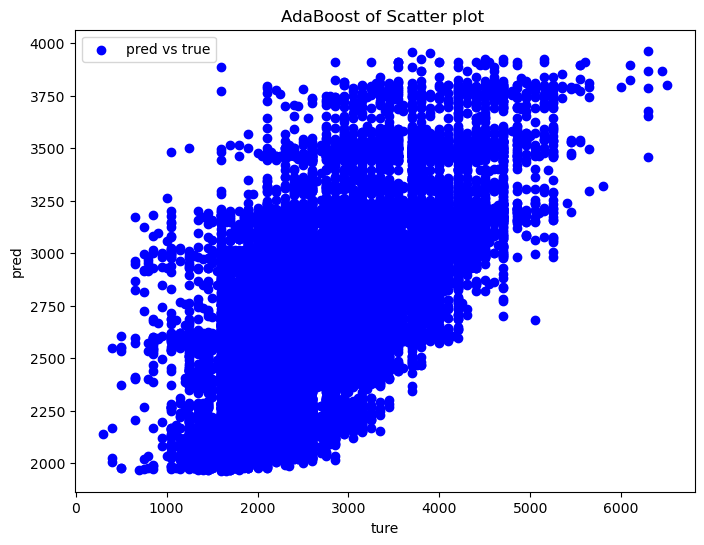

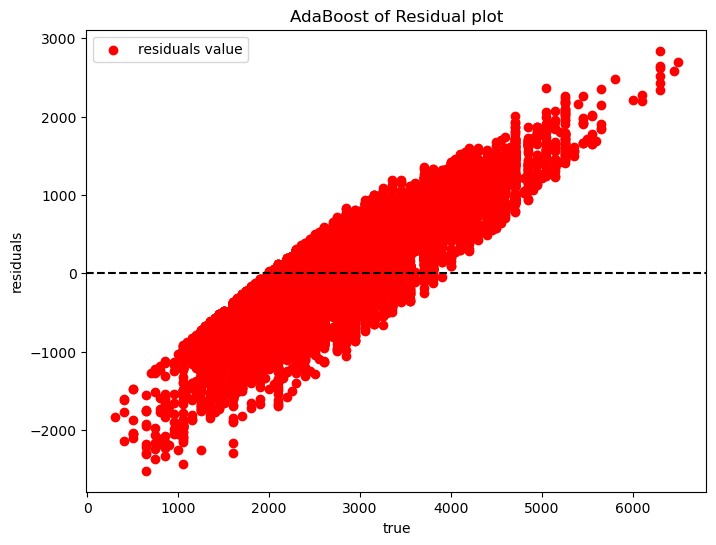

In [15]:
name_AdaBoost = 'AdaBoost'
base_regressor = DecisionTreeRegressor(max_depth=4)
params = {
    "n_estimators": 500,
    "learning_rate": 0.05,
    "random_state" : 42,
}
model_AdaBoost = AdaBoostRegressor(** params)
print(f'Training {name_AdaBoost}...')

model_AdaBoost.fit(X_train, y_train)
y_pred = model_AdaBoost.predict(X_test)

y_train_pred = model_AdaBoost.predict(X_train)

print(f'{name_AdaBoost} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_AdaBoost + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_AdaBoost} training result saved.\n')

print('{} evaluation:\n'.format(name_AdaBoost))

mse_AdaBoost = mean_squared_error(y_train, y_train_pred)
mae_AdaBoost = mean_absolute_error(y_train, y_train_pred)
print(mse_AdaBoost,mae_AdaBoost)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('AdaBoost of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('AdaBoost of Residual plot')
plt.show()
